<a href="https://colab.research.google.com/github/devivempati09/FMML-LAB-1/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

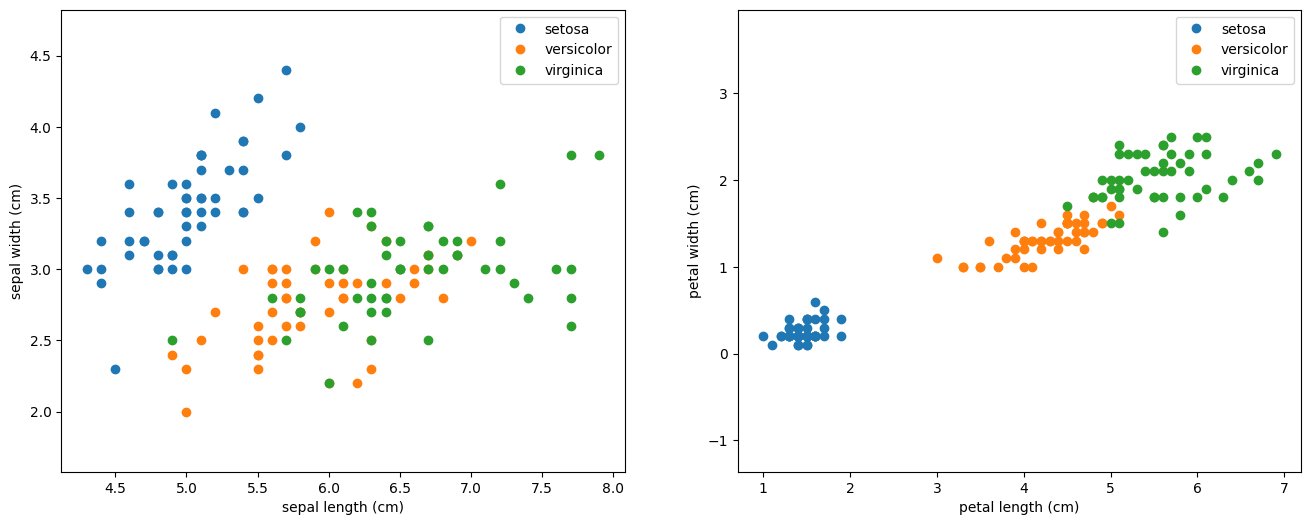

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:01<00:00, 83.31it/s]


# Plot training progress

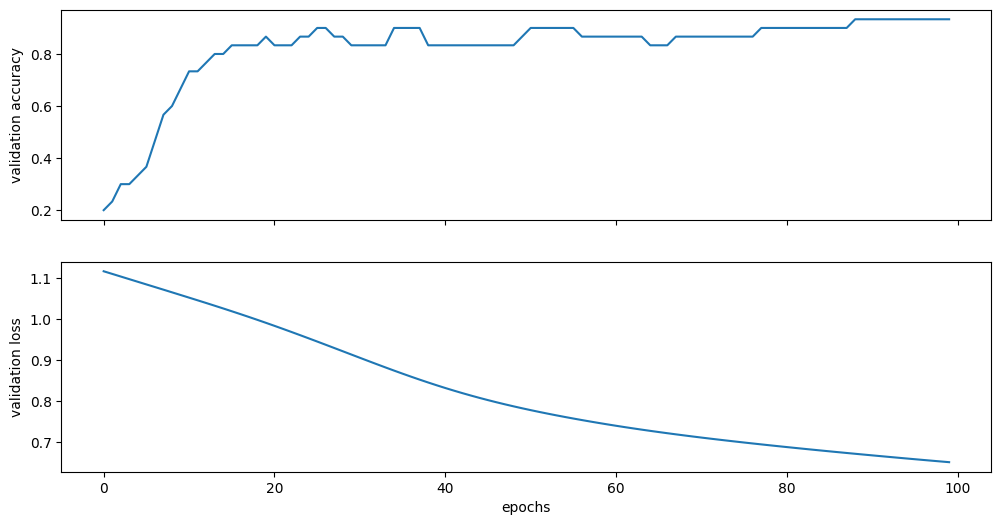

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**1ST QUESTION EXPLANATION-**

The number of hidden layers is a crucial architectural decision in designing a neural network, and it can significantly impact the model's performance, training time, and complexity.

Increasing the number of hidden layers can allow the network to learn more complex representations of the data, potentially leading to better performance, especially for highly nonlinear relationships in the data. However, it also increases the risk of overfitting, where the model learns to memorize the training data instead of generalizing well to unseen data.

Decreasing the number of hidden layers can simplify the model, reducing the risk of overfitting and making the model easier to train. However, it may also limit the model's capacity to learn complex patterns in the data, leading to lower performance, especially for tasks with intricate relationships.

In practice, the optimal number of hidden layers depends on various factors, including the complexity of the data, the size of the dataset, computational resources, and the specific task at hand. It's often beneficial to experiment with different architectures, including varying the number of hidden layers, to find the best-performing model for a given task.

If you have a specific task or dataset in mind, I can provide more tailored advice on how to adjust the number of hidden layers effectively.









**2ND QUESTION EXPLANATION-**

Adjusting the number of neurons in the hidden layer is another important aspect of neural network architecture design. The number of neurons in a hidden layer determines the model's capacity to learn complex patterns in the data.

Here's how changing the number of neurons in the hidden layer can affect the neural network:

1. **Increasing the number of neurons**:
   - Increases the model's capacity to learn complex patterns in the data.
   - May lead to better performance, especially for datasets with intricate relationships.
   - However, it also increases the model's complexity and the risk of overfitting, especially if the dataset is small or noisy.
   - Training time may also increase since there are more parameters to learn.

2. **Decreasing the number of neurons**:
   - Reduces the model's capacity and complexity.
   - May help prevent overfitting, especially if the dataset is small or noisy.
   - However, it may also limit the model's ability to learn complex patterns in the data, leading to lower performance.

Finding the optimal number of neurons in the hidden layer often involves experimentation and tuning. It depends on factors such as the complexity of the data, the size of the dataset, and the specific task being addressed.

If you provide more details about your dataset or the task you're working on, I can offer more specific advice on how to choose the appropriate number of neurons for the hidden layer.

**3RD QUESTION EXPLANATION-**

Certainly! The choice of activation function plays a crucial role in the behavior and performance of a neural network. Here are a few common activation functions and how they impact the network:

1. **ReLU (Rectified Linear Unit)**:
   - Pros: Simple, computationally efficient, and avoids the vanishing gradient problem.
   - Cons: Prone to the "dying ReLU" problem where neurons can become inactive during training.
   - Recommended for: Hidden layers in deep neural networks.

2. **Sigmoid**:
   - Pros: Outputs values in the range [0, 1], making it suitable for binary classification problems.
   - Cons: Suffers from the vanishing gradient problem, especially in deep networks.
   - Recommended for: Output layer in binary classification tasks.

3. **Tanh (Hyperbolic Tangent)**:
   - Pros: Outputs values in the range [-1, 1], making it suitable for symmetric data.
   - Cons: Similar to sigmoid, suffers from the vanishing gradient problem.
   - Recommended for: Hidden layers in shallow networks or networks where input data is normalized to [-1, 1].

4. **Leaky ReLU**:
   - Pros: Addresses the dying ReLU problem by allowing a small gradient when the unit is not active.
   - Cons: Adds complexity to the model.
   - Recommended for: Hidden layers in deep neural networks.

5. **Softmax**:
   - Pros: Outputs a probability distribution over multiple classes, making it suitable for multi-class classification problems.
   - Cons: Sensitive to outliers and noisy data.
   - Recommended for: Output layer in multi-class classification tasks.

Choosing the right activation function depends on the specific characteristics of your dataset and the task at hand. Experimenting with different activation functions can help identify which one works best for your neural network architecture and problem domain.

If you have a specific task or dataset in mind, I can provide more tailored advice on selecting an appropriate activation function.